In [3]:
# import dependencies
# import sys
# !{sys.executable} -m pip install --user install tensorflow==2.8.0. 
import numpy as np
import pandas as pd
import glacierml as gl
import matplotlib.pyplot as plt
RGI = gl.RGI_loader()
df, ref = gl.notebook_data_loader()

Global Volume: 101.48, UB: 39.16, LB: 42.34, STD: 42.19


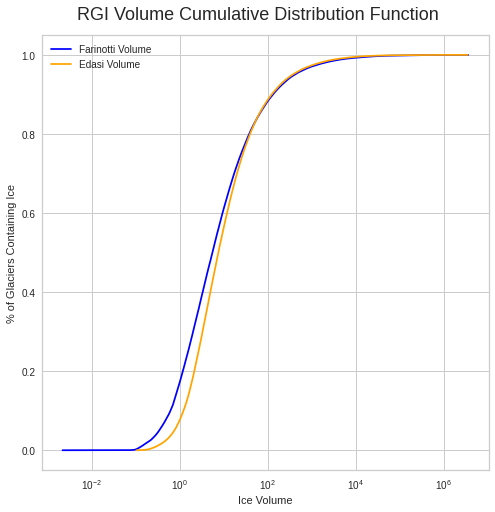

In [4]:
data_1 = ref['Farinotti Mean Thickness'] * ref['Area']
data_2 = ref['Edasi Mean Thickness'] * ref['Area']
#sort data


x_1 = np.sort(data_1)
# x = data_1
#calculate CDF values
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)


x_2 = np.sort(data_2)
# x = data
#calculate CDF values
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

#plot CDF
fig, ax = plt.subplots(1,1,figsize=(8, 8))

plt.subplots_adjust(hspace=0.5)

plt.suptitle('RGI Volume Cumulative Distribution Function', fontsize=18, y=0.93)
fig.patch.set_facecolor('w')


plt.subplots_adjust(hspace=0.5)
plt.plot(
    x_1, 
    y_1,
    c = 'blue',
    label = 'Farinotti Volume'
    
)
plt.plot(
    x_2, 
    y_2,
    c = 'orange',
    label = 'Edasi Volume'
)
plt.legend()
ax.set_xscale('log')
ax.set_xlabel('Ice Volume')
ax.set_ylabel('% of Glaciers Containing Ice')
plt.savefig('figs/cdf/cdf.svg')

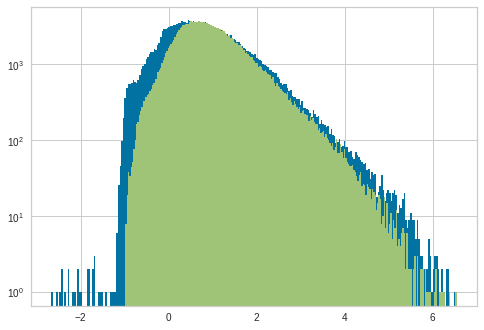

In [5]:
plt.hist(np.log10(data_1), 250)
plt.hist(np.log10(data_2), 250)
plt.yscale('log')
# plt.xlim(0,1e5)
plt.show()

In [6]:
from scipy.interpolate import interp1d

In [7]:
f1 = interp1d(x_1,y_1)
f2 = interp1d(x_2,y_2)

In [8]:
np.log10(x_2.min())

-0.9795398011626495

In [9]:
x = np.logspace(-0.96, 6, 100)
D = np.max(abs(f2(x) - f1(x)))